/tmp/ipython-input-14-751008184.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Timestamp'] = df['Timestamp'].dt.floor('H')
/tmp/ipython-input-14-751008184.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Timestamp'] = df['Timestamp'].dt.floor('H')
/tmp/ipython-input-14-751008184.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Timestamp'] = df['Timestamp'].dt.floor('H')
/tmp/ipython-input-14-751008184.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Timestamp'] = df['Timestamp'].dt.floor('H')


🔹 A1: Class Stats
Distance between class means: 4.4556

🔹 A2: Feature Histogram


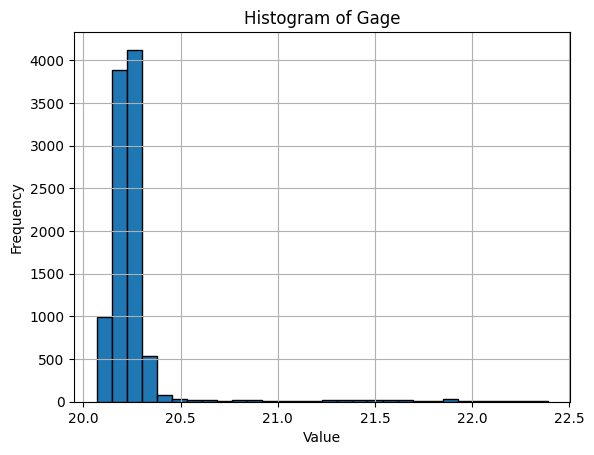

Gage — Mean: 20.2666, Variance: 0.0591

🔹 A3: Minkowski Distance


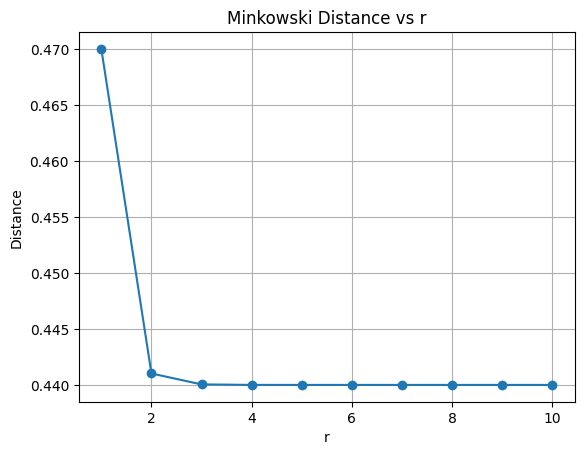

🔹 A4: Train-Test Split
Train: 7000 samples, Test: 3000 samples

🔹 A5: Train k-NN with k=3
🔹 A6: Test Accuracy
Accuracy: 0.9780

🔹 A7: Predict First Test Sample
❌ ERROR OCCURRED:
0


In [14]:
# --- 📦 Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 🔧 Robust File Loader ---
def clean_and_load_file(path, value_name):
    df = pd.read_csv(path, header=None)

    # Case: Single column string, needs manual split
    if df.shape[1] == 1:
        df = df[0].astype(str).str.replace("\\t", "\t", regex=False)
        df = df.str.split("\t", expand=True)

    if df.shape[1] < 5:
        raise ValueError(f"{value_name} file has only {df.shape[1]} columns — expected at least 5.")

    df = df[[df.columns[2], df.columns[4]]]
    df.columns = ['Timestamp', value_name]

    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df[value_name] = pd.to_numeric(df[value_name], errors='coerce')
    return df.dropna()

# --- 🔀 Merge Files ---
def load_merged_data():
    df_storage = clean_and_load_file('/content/reservoir_storage.csv', 'Storage')
    df_gage = clean_and_load_file('/content/gage_height.csv', 'Gage')
    df_precip = clean_and_load_file('/content/precipitation.csv', 'Precip')
    df_flow = clean_and_load_file('/content/stream_flow.csv', 'Flow')

    for df in [df_storage, df_gage, df_precip, df_flow]:
        df['Timestamp'] = df['Timestamp'].dt.floor('H')

    merged = df_storage.merge(df_gage, on='Timestamp') \
                       .merge(df_precip, on='Timestamp') \
                       .merge(df_flow, on='Timestamp')

    merged.dropna(inplace=True)

    if len(merged) > 10000:
        merged = merged.sample(10000, random_state=42)

    return merged

# --- 🧪 Feature & Label Prep ---
def prepare_features_labels(df):
    threshold = df['Storage'].mean()
    y = (df['Storage'] > threshold).astype(int)
    X = df.drop(columns=['Timestamp', 'Storage']).values
    feature_names = df.drop(columns=['Timestamp', 'Storage']).columns
    return X, y, feature_names

# --- 📊 A1: Stats ---
def compute_class_stats(X, y):
    labels = np.unique(y)
    means = [np.mean(X[y == l], axis=0) for l in labels]
    stds = [np.std(X[y == l], axis=0) for l in labels]
    dist = np.linalg.norm(means[0] - means[1])
    return means, stds, dist

# --- 📈 A2: Feature Histogram ---
def plot_feature_histogram(feature_vector, name):
    plt.hist(feature_vector, bins=30, edgecolor='black')
    plt.title(f"Histogram of {name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    return np.mean(feature_vector), np.var(feature_vector)

# --- 📏 A3: Minkowski Distance ---
def compute_minkowski(vec1, vec2, r_vals):
    return [np.linalg.norm(vec1 - vec2, ord=r) for r in r_vals]

def plot_minkowski(r_vals, distances):
    plt.plot(r_vals, distances, marker='o')
    plt.title("Minkowski Distance vs r")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()

# --- 🤖 A5–A9: k-NN ---
def train_knn_model(X_train, y_train, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X, y):
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    prec = precision_score(y, preds, zero_division=0)
    rec = recall_score(y, preds, zero_division=0)
    f1 = f1_score(y, preds, zero_division=0)
    cm = confusion_matrix(y, preds)
    return acc, prec, rec, f1, cm

def plot_accuracy_vs_k(k_vals, accs):
    plt.plot(k_vals, accs, marker='o')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

# --- 🚀 MAIN ---
if __name__ == "__main__":
    try:
        # Load data
        df = load_merged_data()
        X, y, feature_names = prepare_features_labels(df)

        # A1: Class stats
        print("🔹 A1: Class Stats")
        means, stds, dist = compute_class_stats(X, y)
        print(f"Distance between class means: {dist:.4f}\n")

        # A2: Feature Histogram
        print("🔹 A2: Feature Histogram")
        i = 0
        mean_f, var_f = plot_feature_histogram(X[:, i], feature_names[i])
        print(f"{feature_names[i]} — Mean: {mean_f:.4f}, Variance: {var_f:.4f}\n")

        # A3: Minkowski Distance
        print("🔹 A3: Minkowski Distance")
        r_vals = range(1, 11)
        dists = compute_minkowski(X[0], X[1], r_vals)
        plot_minkowski(r_vals, dists)

        # A4: Split Data
        print("🔹 A4: Train-Test Split")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        print(f"Train: {len(X_train)} samples, Test: {len(X_test)} samples\n")

        # A5: Train k-NN (k=3)
        print("🔹 A5: Train k-NN with k=3")
        knn = train_knn_model(X_train, y_train, 3)

        # A6: Test Accuracy
        print("🔹 A6: Test Accuracy")
        print(f"Accuracy: {knn.score(X_test, y_test):.4f}\n")

        # A7: Predict First Test Sample
        print("🔹 A7: Predict First Test Sample")
        sample_vector = X_test[0].reshape(1, -1)
        prediction = knn.predict(sample_vector)[0]
        actual = y_test[0]

        print(f"Predicted label: {prediction}")
        print(f"Actual label:    {actual}\n")



        # A8: Accuracy vs k
        print("🔹 A8: Accuracy vs k")
        k_vals = list(range(1, 12))
        accs = [train_knn_model(X_train, y_train, k).score(X_test, y_test) for k in k_vals]
        plot_accuracy_vs_k(k_vals, accs)

        # A9: Evaluation
        print("🔹 A9: Evaluation Metrics")

        acc_test, prec_test, rec_test, f1_test, cm_test = evaluate_model(knn, X_test, y_test)
        acc_train, prec_train, rec_train, f1_train, cm_train = evaluate_model(knn, X_train, y_train)

        print("\nTest Metrics:")
        print(f"Accuracy: {acc_test:.4f}, Precision: {prec_test:.4f}, Recall: {rec_test:.4f}, F1: {f1_test:.4f}")
        print(f"Confusion Matrix:\n{cm_test}")

        print("\nTrain Metrics:")
        print(f"Accuracy: {acc_train:.4f}, Precision: {prec_train:.4f}, Recall: {rec_train:.4f}, F1: {f1_train:.4f}")
        print(f"Confusion Matrix:\n{cm_train}")

        print("\nFit Inference:")
        if acc_train - acc_test > 0.1:
            print("🔴 Overfitting detected.")
        elif acc_train < 0.75:
            print("🟡 Likely underfitting.")
        else:
            print("🟢 Good generalization.")

    except Exception as e:
        print("❌ ERROR OCCURRED:")
        print(str(e))
